In [109]:
## load libraries ####
rm(list=ls())
suppressPackageStartupMessages(library("dplyr"))
suppressPackageStartupMessages(library("ggplot2"))
suppressPackageStartupMessages(library("Seurat"))
suppressPackageStartupMessages(library("cowplot"))
suppressPackageStartupMessages(library("RColorBrewer"))
#suppressPackageStartupMessages(library("VennDiagram"))
library(networkD3)
path.BCR = file.path("D:","Storage","Ali","10x", "Year2", "mergeBCR","data_v2")
path.work = file.path("D:","Storage","Ali","manuscript","Figure2")
setwd(path.work)

In [110]:
# Read in BCR data
BCR.data.P04 = read.table(file.path(path.BCR, "P04_BCR.tsv"), 
                  header=TRUE, sep="\t",as.is=T,stringsAsFactors = FALSE)
BCR.data.P05 = read.table(file.path(path.BCR, "P05_BCR.tsv"), 
                  header=TRUE, sep="\t",as.is=T,stringsAsFactors = FALSE)

In [111]:
colnames(BCR.data.P04)

[1] "SEQUENCE_ID"          "SEQUENCE_INPUT"       "FUNCTIONAL"          
 [4] "IN_FRAME"             "STOP"                 "MUTATED_INVARIANT"   
 [7] "INDELS"               "V_CALL"               "D_CALL"              
[10] "J_CALL"               "SEQUENCE_VDJ"         "SEQUENCE_IMGT"       
[13] "V_SEQ_START"          "V_SEQ_LENGTH"         "V_GERM_START_VDJ"    
[16] "V_GERM_LENGTH_VDJ"    "V_GERM_START_IMGT"    "V_GERM_LENGTH_IMGT"  
[19] "NP1_LENGTH"           "D_SEQ_START"          "D_SEQ_LENGTH"        
[22] "D_GERM_START"         "D_GERM_LENGTH"        "NP2_LENGTH"          
[25] "J_SEQ_START"          "J_SEQ_LENGTH"         "J_GERM_START"        
[28] "J_GERM_LENGTH"        "JUNCTION"             "JUNCTION_LENGTH"     
[31] "FWR1_IMGT"            "FWR2_IMGT"            "FWR3_IMGT"           
[34] "FWR4_IMGT"            "CDR1_IMGT"            "CDR2_IMGT"           
[37] "CDR3_IMGT"            "CONSCOUNT"            "DUPCOUNT"            
[40] "SUBJECT"              "SAMPLE"               "SAMPLETYPE"          
[43] "DAY"                  "V_GENE"               "D_GENE"              
[46] "J_GENE"               "DATATYPE"             "ISOTYPE"             
[49] "CELL"                 "YEAR"                 "GERMLINE_IMGT_D_MASK"
[52] "CLONE"                "GERMLINE_V_CALL"      "GERMLINE_D_CALL"     
[55] "GERMLINE_J_CALL"      "MU_FREQ"              "CDR3_AA"             
[58] "is.AgSeq"             "is.AgClone"           "cell_id_unique"      
[61] "gex_umap1"            "gex_umap2"            "gex_annotation"      
[64] "sampleType2"

In [112]:
class(unique(BCR.data.P04$YEAR))

[1] "integer"

In [113]:
BCR.data.P04 = dplyr::filter(BCR.data.P04, YEAR==1)
BCR.data.P05 = dplyr::filter(BCR.data.P05, YEAR==1)
# get single cell data
single.data.P04 = BCR.data.P04 %>% 
        dplyr::filter(DATATYPE == "singleCell" & sampleType2 != "BMPC" & !is.na(gex_umap1)) %>%
        dplyr::mutate(sampleType2=factor(sampleType2, levels=c("Blood", "FNA")))
single.data.P05 = BCR.data.P05 %>% 
        dplyr::filter(DATATYPE == "singleCell" & sampleType2 != "BMPC" & !is.na(gex_umap1)) %>%
        dplyr::mutate(sampleType2=factor(sampleType2, levels=c("Blood", "FNA")))

In [114]:
clone.GC.asc.P04 = unique((single.data.P04 %>% dplyr::filter(is.AgClone=="Yes" & gex_annotation=="GC"))$CLONE) 
clone.GC.asc.P05 = unique((single.data.P05 %>% dplyr::filter(is.AgClone=="Yes" & gex_annotation=="GC"))$CLONE) 

In [115]:
single.data.FNA.P04 = dplyr::filter(single.data.P04,sampleType2 == "FNA")
single.data.FNA.P05 = dplyr::filter(single.data.P05,sampleType2 == "FNA")

In [116]:
  # Define universal plot settings in this jupyter notebook
getBaseTheme <- function() {  
  base_theme <- theme_bw() +
    theme(text=element_text(size=13)) +
    theme(plot.title=element_text(size=8)) +
    theme(plot.background=element_blank(),
          panel.grid.major=element_blank(),
          panel.grid.minor=element_blank()) +
    theme(strip.background = element_rect(fill = "white"),
          strip.text=element_text(size=12, face='bold')) +
    theme(axis.title=element_text(size=12, vjust=0.25),
          plot.title = element_text(size=14),
          axis.text.x=element_text(size=12, angle = 45, vjust=0.5, hjust=0.5, face='bold'),
          axis.text.y=element_text(size=12)) +
    theme(legend.text=element_text(size=11),
          legend.title=element_blank(),
          legend.key.height=grid::unit(10, "points"),
          legend.key.width=grid::unit(10, "points"))
  
  return(base_theme)
}
col_anno = c("GC"="dodgerblue2", "PB"="firebrick2", "ABC"="seagreen", 
                     "Naive"="darkgoldenrod2", "RMB"="plum2")

## Annotation of GEX data

In [117]:
if(0){
ggplot()+
    geom_point(data =single.data.P05, aes(x = gex_umap1, y = gex_umap2, color=gex_annotation), size =0.1) +
    getBaseTheme()+
    scale_colour_manual(values = col_anno)+
    guides(color = guide_legend(override.aes = list(size = 3)))+
    facet_wrap(~sampleType2) 
}

### UMAP plot for antigen specific clones in FNA and blood

## 

In [118]:

pdf("Figure3_UMAP_P04_AntigenSpec_Day_annotated_Y1.pdf", width=10, height=5, useDingbats=FALSE)
ggplot()+
    geom_point(data = single.data.P04, 
               aes(x = gex_umap1, y = gex_umap2), color="lightgray", size =0.3) +
    geom_point(data = dplyr::filter(single.data.P04, is.AgClone=="Yes"), 
               aes(x = gex_umap1, y = gex_umap2, colour = gex_annotation), size =0.5) +
    scale_colour_manual(values = col_anno)+
    getBaseTheme()+
    guides(color = guide_legend(override.aes = list(size = 3)))+
    facet_grid(sampleType2~DAY) 

dev.off()    

png 
  2

In [119]:

pdf("Figure3_UMAP_P05_AntigenSpec_Day_annotated_Y1.pdf", width=14, height=4, useDingbats=FALSE)
ggplot()+
    geom_point(data = single.data.P05, 
               aes(x = gex_umap1, y = gex_umap2), color="lightgray", size =0.3) +
    geom_point(data = dplyr::filter(single.data.P05, is.AgClone=="Yes"), 
               aes(x = gex_umap1, y = gex_umap2, colour = gex_annotation), size =0.5) +
    scale_colour_manual(values = col_anno)+
    getBaseTheme()+
    guides(color = guide_legend(override.aes = list(size = 3)))+
    facet_grid(sampleType2~DAY) 

dev.off()    

png 
  2

### UMAP plot for antigen specific clones in FNA

In [120]:

pdf("Figure4_UMAP_P04_AntigenSpec_Day_annotated_Y1.pdf", width=10, height=3, useDingbats=FALSE)
ggplot()+
    geom_point(data = single.data.FNA.P04, 
               aes(x = gex_umap1, y = gex_umap2), color="lightgray", size =0.3) +
    geom_point(data = dplyr::filter(single.data.FNA.P04, is.AgClone=="Yes"), 
               aes(x = gex_umap1, y = gex_umap2, colour = gex_annotation), size =0.5) +
    scale_colour_manual(values = col_anno)+
    getBaseTheme()+
    xlim(5,15)+ylim(-5,10)+
    guides(color = guide_legend(override.aes = list(size = 3)))+
    facet_grid(sampleType2~DAY) 

dev.off()    

Warning message:
"Removed 12817 rows containing missing values (geom_point)."
Warning message:
"Removed 28 rows containing missing values (geom_point)."


png 
  2

In [121]:

pdf("Figure4_UMAP_P05_AntigenSpec_Day_annotated_Y1.pdf", width=13, height=2.5, useDingbats=FALSE)
ggplot()+
    geom_point(data = single.data.FNA.P05, 
               aes(x = gex_umap1, y = gex_umap2), color="lightgray", size =0.3) +
    geom_point(data = dplyr::filter(single.data.FNA.P05, is.AgClone=="Yes"), 
               aes(x = gex_umap1, y = gex_umap2, colour = gex_annotation), size =0.5) +
    scale_colour_manual(values = col_anno)+
    getBaseTheme()+
    xlim(5,15)+ylim(-5,10)+
    guides(color = guide_legend(override.aes = list(size = 3)))+
    facet_grid(sampleType2~DAY) 

dev.off()    

Warning message:
"Removed 26589 rows containing missing values (geom_point)."
Warning message:
"Removed 79 rows containing missing values (geom_point)."


png 
  2

### Donutd Plot of lymphonode PBs

In [122]:
LNPB.P04 = single.data.P04 %>% dplyr::filter(gex_annotation=="PB" & sampleType2=="FNA")
clone.LNPB.P04 = unique(LNPB.P04$CLONE)
as.LNPB.P04 = LNPB.P04 %>% dplyr::filter(is.AgClone=="Yes")
clone.as.LNPB.P04 = unique(as.LNPB.P04$CLONE)
as.LNPB.sharedGC.P04 = as.LNPB.P04 %>% dplyr::filter(CLONE %in% clone.GC.asc.P04)
clone.as.LNPB.sharedGC.P04 = unique(as.LNPB.sharedGC.P04$CLONE)

# At cell level
pie.P04 = LNPB.P04 %>% dplyr::select(CLONE,DAY) %>% 
            dplyr::mutate(category = ifelse(CLONE %in% clone.as.LNPB.P04, "QIV-notGC", "Others")) %>% 
            dplyr::mutate(category = ifelse(CLONE %in% clone.as.LNPB.sharedGC.P04, "QIV-GC", category)) %>% 
            dplyr::group_by(DAY,category) %>%  dplyr::summarise(count=n()) %>% 
            dplyr::group_by(DAY) %>%  dplyr::mutate(dayCount=sum(count)) %>% dplyr::mutate(dayPerc=count/dayCount) %>%            
            dplyr::mutate(DAY1=paste0("Day",DAY)) %>%
            dplyr::mutate(DAY1=factor(DAY1, levels=c("Day0", "Day5","Day12","Day120")))

#mycols <- c("#0073C2FF", "#EFC000FF","#868686FF")
mycols <- c("red","purple","lightgray")
pie.P04 = pie.P04 %>% dplyr::mutate(lab.yn = cumsum(dayPerc) - 0.5*dayPerc)  %>%
    dplyr::mutate(category=factor(category, levels=c("QIV-notGC","QIV-GC","Others")))
p.d = ggplot(pie.P04, aes(x = 2, y = dayPerc, fill = category)) +
  geom_bar(stat = "identity", color = "white") +
  coord_polar(theta = "y", start = 0)+
  geom_text(aes(y = lab.yn, label = count), color = "white")+
  scale_fill_manual(values = mycols) +
  theme_void() +
  xlim(0.5,2.5) +
  facet_wrap(~DAY1, nrow=1)
pdf("Figure4_Donuts_LNPB_P04_Y1.pdf", width=9, height=2.2, useDingbats=FALSE)
plot(p.d)
dev.off()

`summarise()` has grouped output by 'DAY'. You can override using the `.groups` argument.



png 
  2

In [123]:
LNPB.P05 = single.data.P05 %>% dplyr::filter(gex_annotation=="PB" & sampleType2=="FNA")
clone.LNPB.P05 = unique(LNPB.P05$CLONE)
as.LNPB.P05 = LNPB.P05 %>% dplyr::filter(is.AgClone=="Yes")
clone.as.LNPB.P05 = unique(as.LNPB.P05$CLONE)
as.LNPB.sharedGC.P05 = as.LNPB.P05 %>% dplyr::filter(CLONE %in% clone.GC.asc.P05)
clone.as.LNPB.sharedGC.P05 = unique(as.LNPB.sharedGC.P05$CLONE)

pie.P05 = LNPB.P05 %>% dplyr::select(CLONE,DAY) %>% 
            dplyr::mutate(category = ifelse(CLONE %in% clone.as.LNPB.P05, "QIV-notGC", "Others")) %>% 
            dplyr::mutate(category = ifelse(CLONE %in% clone.as.LNPB.sharedGC.P05, "QIV-GC", category)) %>% 
            dplyr::group_by(DAY,category) %>%  dplyr::summarise(count=n()) %>% 
            dplyr::group_by(DAY) %>%  dplyr::mutate(dayCount=sum(count)) %>% dplyr::mutate(dayPerc=count/dayCount) %>%            
            dplyr::mutate(DAY1=paste0("Day",DAY)) %>%
            dplyr::mutate(DAY1=factor(DAY1, levels=c("Day0", "Day5","Day12","Day28","Day60","Day90")))

mycols <- c("red","purple","lightgray")
pie.P05 = pie.P05 %>% dplyr::mutate(lab.yn = cumsum(dayPerc) - 0.5*dayPerc)  %>%
    dplyr::mutate(category=factor(category, levels=c("QIV-notGC","QIV-GC","Others")))
p.d = ggplot(pie.P05, aes(x = 2, y = dayPerc, fill = category)) +
  geom_bar(stat = "identity", color = "white") +
  coord_polar(theta = "y", start = 0)+
  geom_text(aes(y = lab.yn, label = count), color = "white")+
  scale_fill_manual(values = mycols) +
  theme_void() +
  xlim(0.5,2.5) +
  facet_wrap(~DAY1, nrow=1)
pdf("Figure4_Donuts_LNPB_P05_Y1.pdf", width=13, height=2.2, useDingbats=FALSE)
plot(p.d)
dev.off()

`summarise()` has grouped output by 'DAY'. You can override using the `.groups` argument.



png 
  2

### UMAP for GC clone shared with LNPB and LNABC

In [124]:
as.GC.P05 = single.data.P05 %>% dplyr::filter(gex_annotation=="GC" & is.AgClone=="Yes")
clone.as.GC.P05 = unique(as.GC.P05$CLONE)

LNABC.P05 = single.data.P05 %>% dplyr::filter(gex_annotation=="ABC" & sampleType2=="FNA")
clone.LNABC.P05 = unique(LNABC.P05$CLONE)
LNPB.P05 = single.data.P05 %>% dplyr::filter(gex_annotation=="PB" & sampleType2=="FNA")
clone.LNPB.P05 = unique(LNPB.P05$CLONE)
clone.shared.LNPBLNABC.P05 = intersect(clone.LNABC.P05, clone.LNPB.P05)
length(clone.LNPB.P05)
length(clone.LNABC.P05)
length(clone.shared.LNPBLNABC.P05)
clone.shared.LNPBLNABCGC.P05 = intersect(clone.shared.LNPBLNABC.P05, clone.as.GC.P05)
length(clone.shared.LNPBLNABCGC.P05)

[1] 201

[1] 395

[1] 21

[1] 7

In [125]:
clone.shared.LNPBLNABCGC.P05

[1] 102532 126281 126742 134617  26079  28038  47489

In [126]:
# Read in BCR data
curSubject = "P05"
BCR.data=BCR.data.P05
# get single cell data
single.data = BCR.data %>% 
        filter(DATATYPE == "singleCell") %>%
        filter(!is.na(gex_umap1))
bulk.data = BCR.data %>% 
        filter(DATATYPE == "bulk") 
mAb.data = BCR.data %>% 
        filter(DATATYPE == "mAb") 
single.data$sampleType2=factor(single.data$sampleType2, levels=c("Blood", "FNA","BMPC"))
bulk.data$sampleType2=factor(bulk.data$sampleType2, levels=c("Blood", "FNA","BMPC"))
mAb.data$sampleType2=factor(mAb.data$sampleType2, levels=c("Blood", "FNA","BMPC"))

In [127]:
pdf("UMAP_GC_LNPB_LNABC_P05_v2.pdf", width=15, height=5.5, useDingbats=FALSE)
for(clone.cur in clone.shared.LNPBLNABCGC.P05){
    cat("Clone: ", clone.cur, "\n")
    cur.single.data = single.data %>% select(CLONE, sampleType2, DAY,gex_umap1, gex_umap2,ISOTYPE, MU_FREQ) %>% filter(CLONE %in% clone.cur)
    cur.single.data$CLONE = as.character(cur.single.data$CLONE)
    cur.bulk.data = bulk.data %>% select(CLONE, sampleType2, DAY,gex_umap1, gex_umap2,ISOTYPE, MU_FREQ) %>% filter(CLONE %in% clone.cur)
    cur.bulk.data$CLONE = as.character(cur.bulk.data$CLONE)
    cur.mAb.data = mAb.data %>% select(CLONE, sampleType2, DAY,gex_umap1, gex_umap2,ISOTYPE, MU_FREQ) %>% filter(CLONE %in% clone.cur)
    cur.mAb.data$CLONE = as.character(cur.mAb.data$CLONE)

    # antigen specific clone count
    cur.s.count = cur.single.data %>% select(sampleType2,DAY) %>% group_by(sampleType2,DAY) %>% summarise(sCount=n()) 
    cur.b.count = cur.bulk.data %>% select(sampleType2,DAY) %>% group_by(sampleType2,DAY) %>% summarise(sCount=n()) 
    cur.a.count = cur.mAb.data %>% select(sampleType2,DAY) %>% group_by(sampleType2,DAY) %>% summarise(sCount=n())
    # all clone count
    all.s.count = single.data %>% select(sampleType2,DAY) %>% group_by(sampleType2,DAY) %>% summarise(sCount=n()) 
    all.b.count = bulk.data %>% select(sampleType2,DAY) %>% group_by(sampleType2,DAY) %>% summarise(sCount=n()) 
    # count for antigen specific clones
    s_label <- data.frame(
        sampleType2 = cur.s.count$sampleType2,
        DAY   = cur.s.count$DAY,
        label = cur.s.count$sCount
    )
    b_label <- data.frame(
        sampleType2 = cur.b.count$sampleType2,
        DAY   = cur.b.count$DAY,
        label = cur.b.count$sCount
                )
                
    # count for all clones
    s_all_label <- data.frame(
        sampleType2 = all.s.count$sampleType2,
        DAY   = all.s.count$DAY,
        label = all.s.count$sCount
    )
    b_all_label <- data.frame(
        sampleType2 = all.b.count$sampleType2,
        DAY   = all.b.count$DAY,
        label = all.b.count$sCount
    )
    # labels
    st_text <- data.frame(
        sampleType2 = all.s.count$sampleType2,
        DAY   = all.s.count$DAY,
        label = "s: "
    )
    bt_text <- data.frame(
        sampleType2 = all.b.count$sampleType2,
        DAY   = all.b.count$DAY,
        label = "b: "
    )
    # when cur.a.count is empty cause NA columns in final output umap plot
    #sampleType2 DAY sCount
    #NA NA 0
    # So need to not iclude cur.a.count if nothing in it
    if(dim(cur.a.count)[1]==1 && is.na(cur.a.count$sampleType2)){ 
        p=ggplot()+
                geom_point(data = single.data, aes(x = gex_umap1, y = gex_umap2), color="lightgray", size =0.7) +
                geom_point(data = cur.single.data, aes(x = gex_umap1, y = gex_umap2, color=ISOTYPE,size=MU_FREQ)) +
                getBaseTheme()+
                geom_text(x = -10, y = 13, aes(label = label), data = st_text, color="black")+
                geom_text(x = -7.5, y = 13, aes(label = label), data = s_label, color="red")+
                geom_text(x = 0, y = 13, aes(label = label), data = s_all_label, color="gray")+
                geom_text(x = -10, y = 10, aes(label = label), data = bt_text, color="black")+
                geom_text(x = -7.5, y = 10, aes(label = label), data = b_label, color="red")+
                geom_text(x = 0, y = 10, aes(label = label), data = b_all_label, color="gray")+
                #geom_text(x = 13, y = -10, aes(label = label), data = a_label, color="red")+
                facet_grid(sampleType2~DAY) +
                ggtitle(paste0("Clone: ", clone.cur))
    }else{
        a_label <- data.frame(
            sampleType2 = cur.a.count$sampleType2,
            DAY   = cur.a.count$DAY,
            label = cur.a.count$sCount)
        p=ggplot()+
                geom_point(data = single.data, aes(x = gex_umap1, y = gex_umap2), color="lightgray", size =0.7) +
                geom_point(data = cur.single.data, aes(x = gex_umap1, y = gex_umap2, color=ISOTYPE,size=MU_FREQ)) +
                getBaseTheme()+
                geom_text(x = -10, y = 13, aes(label = label), data = st_text, color="black")+
                geom_text(x = -7.5, y = 13, aes(label = label), data = s_label, color="red")+
                geom_text(x = 0, y = 13, aes(label = label), data = s_all_label, color="gray")+
                geom_text(x = -10, y = 10, aes(label = label), data = bt_text, color="black")+
                geom_text(x = -7.5, y = 10, aes(label = label), data = b_label, color="red")+
                geom_text(x = 0, y = 10, aes(label = label), data = b_all_label, color="gray")+
                geom_text(x = 13, y = -10, aes(label = label), data = a_label, color="red")+
                facet_grid(sampleType2~DAY) +
                ggtitle(paste0("Clone: ", clone.cur))
    }
    plot(p)          
}
dev.off()

Clone:  102532 


`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.



Clone:  126281 


`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.



Clone:  126742 


`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.



Clone:  134617 


`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.



Clone:  26079 


`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.



Clone:  28038 


`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.



Clone:  47489 


`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sampleType2'. You can override using the `.groups` argument.



png 
  2

### Boxplot for mutation frequency

In [128]:
single.data.P04.GCPB.asc = single.data.FNA.P04 %>% 
                            dplyr::filter(is.AgClone=="Yes" & 
                                (gex_annotation=="GC" | gex_annotation=="PB")) %>%
                            dplyr::mutate(DAY = as.character(DAY)) %>%
                            dplyr::mutate(DAY = factor(DAY, levels = c("5", "12", "120")))
single.data.P05.GCPB.asc = single.data.FNA.P05 %>% 
                            dplyr::filter(is.AgClone=="Yes" & 
                                (gex_annotation=="GC" | gex_annotation=="PB") )%>%
                            dplyr::mutate(DAY = as.character(DAY)) %>%
                            dplyr::mutate(DAY = factor(DAY, levels = c("12", "28", "60", "90")))

In [129]:
pdf("Figure4_Boxplot_P04_MutFreq_QIVGCPB_Y1.pdf", width=4, height=4, useDingbats=FALSE)
#sample.size = as.vector(table(single.data.P04.GC.asc$DAY))
mycols <- c("blue","red")
ggplot(data = single.data.P04.GCPB.asc, aes(x = DAY, y = MU_FREQ))+
    geom_violin(trim=FALSE)+
    geom_boxplot(width=0.1)+
    #scale_color_manual(values = mycols) +
    getBaseTheme()+
    facet_wrap(~gex_annotation)
dev.off()  

Warning message:
"Groups with fewer than two data points have been dropped."


png 
  2

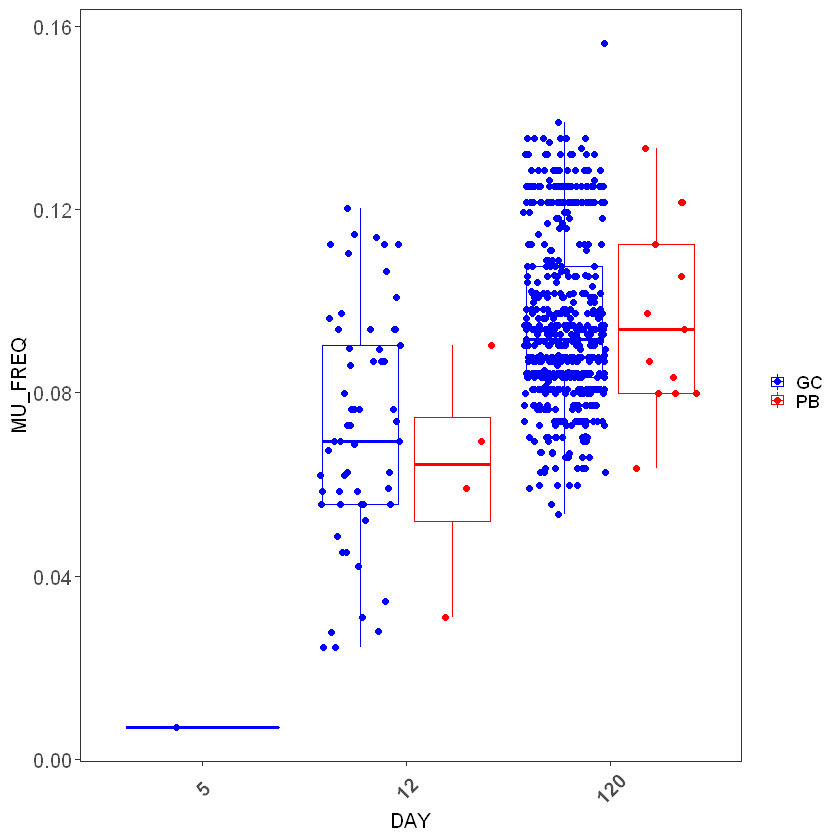

In [130]:
#pdf("Figure4_Boxplot_P04_MutFreq_QIVGCPB_v2.pdf", width=4, height=4, useDingbats=FALSE)
mycols <- c("blue","red")
ggplot(single.data.P04.GCPB.asc, 
       aes(x = DAY, y = MU_FREQ,color=gex_annotation,fill=gex_annotation))  +             
      geom_boxplot(fill="white",outlier.colour = NA,  position = position_dodge(width=0.9))+
      geom_point(position=position_jitterdodge(dodge.width=0.9)) +
      scale_color_manual(values = mycols) +
      getBaseTheme()

#dev.off()  

In [131]:
pdf("Figure4_Boxplot_P05_MutFreq_QIVGCPB_Y1.pdf", width=4, height=4, useDingbats=FALSE)
mycols <- c("blue","red")
ggplot(data = single.data.P05.GCPB.asc, aes(x = DAY, y = MU_FREQ))+
    geom_violin(trim=FALSE)+
    geom_boxplot(width=0.1)+
    getBaseTheme()+
    facet_wrap(~gex_annotation)
dev.off()   

png 
  2

In [132]:
single.data.P04.GCPB.asc.g = single.data.P04.GCPB.asc %>%
        dplyr::select(gex_annotation, CLONE, MU_FREQ, DAY) %>%
        dplyr::group_by(gex_annotation, CLONE, DAY) %>%
        dplyr::summarise(MutationFreq = median(MU_FREQ))
single.data.P05.GCPB.asc.g = single.data.P05.GCPB.asc %>%
        dplyr::select(gex_annotation, CLONE, MU_FREQ, DAY) %>%
        dplyr::group_by(gex_annotation, CLONE, DAY) %>%
        dplyr::summarise(MutationFreq = median(MU_FREQ))

`summarise()` has grouped output by 'gex_annotation', 'CLONE'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'gex_annotation', 'CLONE'. You can override using the `.groups` argument.



### Line plot for mutation frequency

In [133]:
pdf("Figure4_Lineplot_P04_MutFreq_QIVGCPB_Y1_v2.pdf", width=4.7, height=3, useDingbats=FALSE)
mycols = c("dodgerblue2", "firebrick2")
ggplot(data = single.data.P04.GCPB.asc.g, aes(x = gex_annotation, y = MutationFreq, color=gex_annotation))+
    geom_point()+
    geom_line(aes(group=CLONE), size=0.5, color="black")+
    scale_color_manual(values = mycols) +
    xlab("")+
    ylab("Clone mutation Frequency")+
    ylim(c(0,0.2))+
    getBaseTheme()+
    facet_wrap(~DAY)
dev.off()

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



png 
  2

In [134]:
pdf("Figure4_Lineplot_P05_MutFreq_QIVGCPB_Y1.pdf", width=6, height=3, useDingbats=FALSE)
mycols = c("dodgerblue2", "firebrick2")
ggplot(data = single.data.P05.GCPB.asc.g, aes(x = gex_annotation, y = MutationFreq, color=gex_annotation))+
    geom_point()+
    geom_line(aes(group=CLONE), size=0.5, color="black")+
    scale_color_manual(values = mycols) +
    xlab("")+
    ylab("Clone mutation Frequency")+
    getBaseTheme()+
    facet_wrap(~DAY, nrow=1)
dev.off()

png 
  2

### Ag Binding clones

In [135]:
pdf("P04_AgBindingClones_v1.pdf", width=10, height=5, useDingbats=FALSE)
#clone.AgB.P04 = c(46649, 19935, 34409)
for(clone.cur in clone.AgB.P04){
    cur.single.data = single.data.P04 %>% dplyr::filter(CLONE==clone.cur)
    p=ggplot()+
                geom_point(data = single.data.P04, aes(x = gex_umap1, y = gex_umap2), color="lightgray", size =0.7) +
                geom_point(data = cur.single.data, aes(x = gex_umap1, y = gex_umap2, color=MU_FREQ)) +
                scale_colour_continuous(trans = 'reverse')+
                getBaseTheme()+
                facet_grid(sampleType2~DAY) +
                ggtitle(paste0("Clone: ", clone.cur))
    plot(p)

}
dev.off()

ERROR: Error in eval(expr, envir, enclos): object 'clone.AgB.P04' not found


In [ ]:
pdf("P05_AgBindingClones_v2.pdf", width=14, height=4, useDingbats=FALSE)
#clone.AgB.P05 = c(41699,125615,48947,60451,113529)
for(clone.cur in clone.AgB.P05){
    cur.single.data = single.data.P05 %>% dplyr::filter(CLONE==clone.cur)
    p=ggplot()+
                geom_point(data = single.data.P05, aes(x = gex_umap1, y = gex_umap2), color="lightgray", size =0.7) +
                geom_point(data = cur.single.data, aes(x = gex_umap1, y = gex_umap2, color=MU_FREQ)) +
                getBaseTheme()+
                scale_colour_continuous(trans = 'reverse')+
                facet_grid(sampleType2~DAY) +
                ggtitle(paste0("Clone: ", clone.cur))
    plot(p)

}
dev.off()

In [ ]:
out.mutFreq.FNA.P04 = single.data.FNA.P04 %>%
                dplyr::filter(gex_annotation=="GC") %>%
                dplyr::select(SEQUENCE_ID, sampleName2, DAY, gex_annotation, CLONE, MU_FREQ,is.AgClone=="Yes")
write.table(out.mutFreq.FNA.P04, file = "mutFreq_FNAGC_singleCell_P04.txt",  sep = "\t", row.names = FALSE )

out.mutFreq.FNA.P05 = single.data.FNA.P05 %>%
                dplyr::filter(gex_annotation=="GC") %>%
                dplyr::select(SEQUENCE_ID, sampleName2, DAY, gex_annotation, CLONE, MU_FREQ,is.AgClone=="Yes")
write.table(out.mutFreq.FNA.P05, file = "mutFreq_FNAGC_singleCell_P05.txt",  sep = "\t", row.names = FALSE )

In [ ]:
colnames(single.data.FNA.P04)